<a href="https://colab.research.google.com/github/jiayee00/eportfolio-SECB4313/blob/main/%5B1_April_2024%5D_Heart_Disease_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
### 1. Link notebook with google drive and access data from your personal Gdrive
from google.colab import drive
drive.mount('/content/gdrive')

### 2.Set the data path for dataset and model location (ex: model_loc = "/content/gdrive/My Drive/Dataset/")
dataset_dir = "/content/gdrive/My Drive/Colab Notebooks/dataset/"
model_loc = "/content/gdrive/My Drive/Colab Notebooks/"

print(os.listdir(dataset_dir))
data = pd.read_csv(dataset_dir+'heart.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['heart.csv']


In [60]:
### 3. Insert Exploratory data analysis (EDA) steps to analyze and investigate datasets.
# check first few rows of dataset
print("Check first few rows")
print(data.head())

# get summary statistics of numerical features
print("Get summary statistics")
print(data.describe())

# check data types of each column
print("Check data types")
print(data.info())

# identify missing values
print("Identify missing values")
print(data.isnull().sum())


Check first few rows
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Get summary statistics
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.00

In [32]:
### 4. What is the purpose of the code that sets a list of categorical variables
### in a dataset and then casts those variables to the object data type using the astype() function?

catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object

4. What is the purpose of the code that sets a list of categorical variables in a dataset and then casts those variables to the object data type using the astype() function?

The purpose is to transform the categorical data into format that suitable for machine learning or deep learning tasks like classification.


In [34]:
 ### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function
data = pd.get_dummies(data)
print(data)

     age  trestbps  chol  thalach  oldpeak  slope  target  sex_0  sex_1  cp_0  \
0     63       145   233      150      2.3      0       1      0      1     0   
1     37       130   250      187      3.5      0       1      0      1     0   
2     41       130   204      172      1.4      2       1      1      0     0   
3     56       120   236      178      0.8      2       1      0      1     0   
4     57       120   354      163      0.6      2       1      1      0     1   
..   ...       ...   ...      ...      ...    ...     ...    ...    ...   ...   
298   57       140   241      123      0.2      1       0      1      0     1   
299   45       110   264      132      1.2      1       0      0      1     0   
300   68       144   193      141      3.4      1       0      0      1     1   
301   57       130   131      115      1.2      1       0      0      1     1   
302   57       130   236      174      0.0      1       0      1      0     0   

     ...  thal_1  thal_2  t

In [41]:
### 6. Explain line 3,4 and 5 and print the shape of x and y

y = data['target'].values
y = y.reshape(y.shape[0],1)
x = data.drop(['target'],axis=1)
##

6. Explain line 3,4 and 5

line 3: y = data['target'].values
To extracts target variable from dataset and convert it into numpy array

line 4: y = y.reshape(y.shape[0], 1)
To reshape the target variable to single column to ensure it is compatible to the models by using .shape[0] mean retrieve rows' number.

line 5: x = data.drop(['target'], axis=1)
To remove the target column and result in x contain all other features only.

In [59]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset
sample_data = {
    'attribute1': [1,2,3,4,5],
    'attribute2': [100,200,300,400,630],
    'attribute3': [10,20,30,40,53]
}

df = pd.DataFrame(sample_data)
print(df)

y_sample = df['attribute1'].values
y_sample = y_sample.reshape(y_sample.shape[0],1)
x_sample = df.drop(['attribute1'],axis=1)

minx = np.min(x_sample)
maxx = np.max(x_sample)
x_sample = (x_sample - minx) / (maxx - minx)
x_sample.head()
print(x_sample.head())


   attribute1  attribute2  attribute3
0           1         100          10
1           2         200          20
2           3         300          30
3           4         400          40
4           5         630          53
   attribute2  attribute3
0    0.000000    0.000000
1    0.188679    0.232558
2    0.377358    0.465116
3    0.566038    0.697674
4    1.000000    1.000000


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [42]:
### 8. Describe the heart dataset after implementing the min max normalization
#Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


8. Describe the heart dataset after implementing the min max normalization

After conducting min max normalization, the each feature's value in heart dataset is under the range from 0 to 1.

In [43]:
### 9. Modify the code to split the dataset into train and test (train 70%, val 20% and test 10%).

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
# re-create train and validation set
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# train 70%, validation 20%, test 10%
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(217, 13)
(55, 13)
(31, 13)


In [47]:
### 10. What is the purpose of each layer in the neural network created using the Sequential() function with 64, 32, and 1 neurons,
### respectively, and softmax and sigmoid activation functions?

model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=13, activation='softmax')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


10. What is the purpose of each layer in the neural network created using the Sequential() function with 64, 32, and 1 neurons respectively, and softmax and sigmoid activation functions?

The purpose of each layer in neural network created to ensure each layer have the own function to pass data to network, extract features and learn representation and produce the final prediction using a suitable activation function.


In [48]:
### 11. This code compiles a neural network model with a mean squared error loss function, the Adam optimizer with a learning rate of 0.01,
### and accuracy as a performance metric. What does each of these components mean, and how do they affect the model training and performance?

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

11. This code compiles a neural network model with a mean squared error loss function, the Adam optimizer with a learning rate of 0.01, and accuracy as a performance metric. What does each of these components mean, and how do they affect the model training and performance?

mse loss function is used to quantify how well the model's prediction match the actual target values. The lower MSE value show better model performance in minimizing prediction errors.

Adam optimizer is used to determine how the model's weights are updated during training. It able to adapt the learning rate for each parameter individually based on past gradient. It is crucial for efficient convergence.

Accuracy is important to measure the percentage of correctly predicted instances and in short is how well the model performance.



In [49]:
# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=16, verbose=1, callbacks=callbacks_list)

Epoch 1/1000
14/14 [==============================] - 1s 19ms/step - loss: 0.2509 - acc: 0.4977 - val_loss: 0.2479 - val_acc: 0.5455
Epoch 2/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2484 - acc: 0.5438 - val_loss: 0.2474 - val_acc: 0.5455
Epoch 3/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2465 - acc: 0.5438 - val_loss: 0.2449 - val_acc: 0.5455
Epoch 4/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2437 - acc: 0.5438 - val_loss: 0.2400 - val_acc: 0.5455
Epoch 5/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.2384 - acc: 0.5438 - val_loss: 0.2315 - val_acc: 0.5455
Epoch 6/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2284 - acc: 0.5714 - val_loss: 0.2173 - val_acc: 0.7455
Epoch 7/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2149 - acc: 0.8157 - val_loss: 0.1981 - val_acc: 0.8364
Epoch 8/1000
14/14 [==============================] - 0s 6ms/step - loss: 0

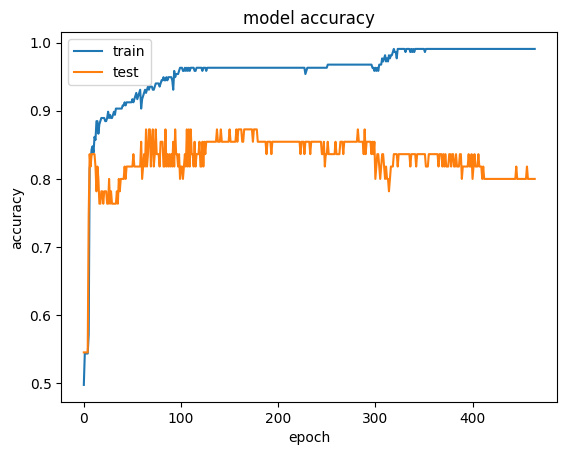

In [50]:
### 12. What does the plot generated by this code represent?

plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

12. What does the plot generated by this code represent?

The plot generated by this code represent the line chart that display model accuracy.

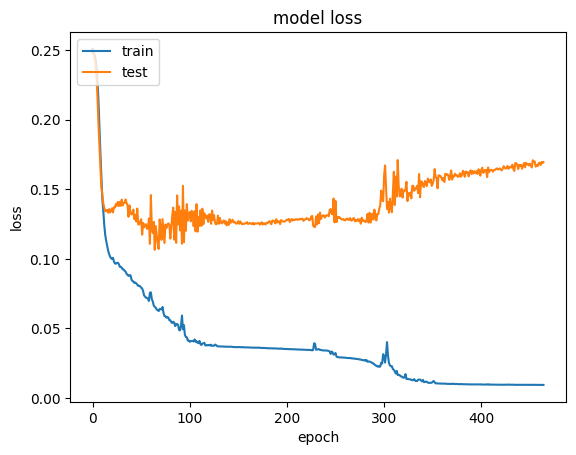

In [51]:
### 13. Plot code for the model loss. You can refer to the plot code for model accuracy above.

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

In [52]:
### 14. What is the purpose of evaluating the model on the test dataset?

#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

1/1 [==============================] - 0s 27ms/step - loss: 0.2987 - acc: 0.6774

acc: 67.74%
loss: 0.3


14. What is the purpose of evaluating the model on the test dataset?

The purpose is to assess the model generalization, measure model performance and assist in hyperparameter tuning.


In [53]:
#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

1/1 [==============================] - 0s 89ms/step
No: 1 Actual: [0]  Predicted: [0] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [1]  Predicted: [1] Result: Pass
No: 4 Actual: [0]  Predicted: [0] Result: Pass
No: 5 Actual: [1]  Predicted: [1] Result: Pass
No: 6 Actual: [1]  Predicted: [1] Result: Pass
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [0]  Predicted: [0] Result: Pass
No: 9 Actual: [0]  Predicted: [0] Result: Pass
No: 10 Actual: [1]  Predicted: [0]  Result: Fail
No: 11 Actual: [1]  Predicted: [1] Result: Pass
No: 12 Actual: [1]  Predicted: [0]  Result: Fail
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [1]  Result: Fail
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [1]  Predicted: [1] Result: Pass
No: 18 Actual: [0]  Predicted: [0] Result: Pass
No: 19 Actual: [0]  Predicted: [0] Result: Pass
No: 20 Actual: [0]  Predicted: [0] Result

15. What is Confusion Matrix and why you need it? Explain TP, FP, FN, TN.

Confusion matrix is a table that summarizes the performance of machine learning model. The reason we need it for evaluating model performance, to calculate recall, precision and accuracy as well as reveal the class imbalance issue in the model.

TP (True Positive) is the instances where model correctly predicts a positive data point.
TN (True Negative) is the instances where model correctly predicts a negative data point.
FP (False Positive) is the instances where model predicts a positive data point incorrectly.
FN (False Negative) is the instance where model mispredict negative data point.

16. Explain the classification report produce.
The classification report produced shown that class 0 has 14 instances while class 1 has 17 instances. The result refers to weighted average because each class size is different as it will be more accurate to get the correct result. The precision, recall and f1-score values obtained are 0.68 (68%).

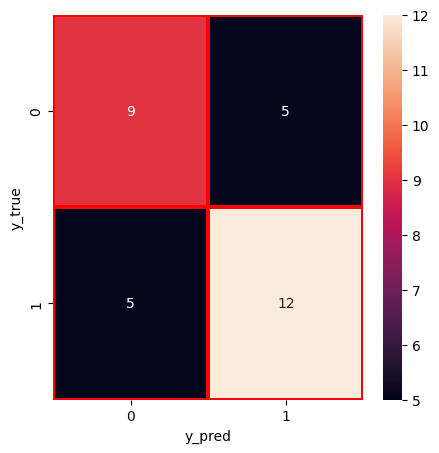


              precision    recall  f1-score   support

           0       0.64      0.64      0.64        14
           1       0.71      0.71      0.71        17

    accuracy                           0.68        31
   macro avg       0.67      0.67      0.67        31
weighted avg       0.68      0.68      0.68        31



In [54]:
### 15. What is Confusion Matrix and why you need it? Explain TP, FP, FN, TN.
### 16. Explain the classification report produce.

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))